<h1 style="color:#007bff;">Milestone 3: Exploratory Data Analysis (EDA)</h1>


<h2 style="color:#007bff;">Mental Health Project</h2>


In [1]:
from IPython.display import display, Image

img = 'C:/Users/CELESTE/CodeOp/Module_3/EDA-milestone-3/Img_MentalHealth_2.jpg'

display(Image(filename=img))

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/CELESTE/CodeOp/Module_3/EDA-milestone-3/Img_MentalHealth_2.jpg'

### Context

This project focuses on exploring and analyzing data related to mental health in the workplace, an increasingly important topic given the prevalence of stress, anxiety, and other mental health issues in the work environment.

The aim is to understand the prevalence of these problems among individuals and the factors that influence them, with the intention of promoting their well-being and creating healthier work environments. Through exploratory data analysis, the goal is to identify insights that can support strategies for improving mental health and well-being at work.


### Importing Libraries and Loading Dataset

In [170]:
# import all necesary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium

In [171]:
# read & load the dataset into pandas dataframe
df = pd.read_csv("C:\\Users\\CELESTE\\CodeOp\\Module_3\\EDA-milestone-3\\archive\\mental_health_dataset.csv")

# display the dataframe
df.head(3)

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


### About the dataset

"This dataset appears to contain a variety of features related to text analysis, sentiment analysis, and psychological indicators, likely derived from posts or text data. Some features include readability indices such as Automated Readability Index (ARI), Coleman Liau Index, and Flesch-Kincaid Grade Level, as well as sentiment analysis scores like sentiment compound, negative, neutral, and positive scores. Additionally, there are features related to psychological aspects such as economic stress, isolation, substance use, and domestic stress. The dataset seems to cover a wide range of linguistic, psychological, and behavioural attributes, potentially suitable for analyzing mental health-related topics in online communities or text data."

The dataset used in this analysis was sourced from https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset. It is important to note that the dataset primarily consists of data from male participants. Therefore, a decision was made to conduct separate analyses for male and female participants to ensure a comprehensive understanding of the data and avoid potential biases.


In [172]:
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(df.shape[0], df.shape[1]))

The Dataset Contains, Rows: 292,364 & Columns: 17


## Starting the analysis

In [173]:
numerical_columns = df.columns[(df.dtypes != 'object').tolist()].tolist()

categorical_columns = df.columns[(df.dtypes == 'object').tolist()].tolist()

print(numerical_columns)
print(categorical_columns)

#Because all columns are categorical values, the following analysis is conducted...

[]
['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']


## EDA for Categorical Variables

In [174]:
df_cat_stats = pd.DataFrame(columns=['column', 'values', 'values_count_incna', 'values_count_nona', 'num_miss'])

tmp = pd.DataFrame()

for c in df.columns:
    tmp['column'] = [c]
    tmp['values'] = [df[c].unique()]
    tmp['values_count_incna'] = len(list(df[c].unique()))
    tmp['values_count_nona'] = int(df[c].nunique())
    tmp['num_miss'] = df[c].isnull().sum()
    df_cat_stats = pd.concat([df_cat_stats, tmp], ignore_index=True)

df_cat_stats

,column,values,values_count_incna,values_count_nona,num_miss
0,Timestamp,"[8/27/2014 11:29, 8/27/2014 11:31, 8/27/2014 1...",580,580,0
1,Gender,"[Female, Male]",2,2,0
2,Country,"[United States, Poland, Australia, Canada, Uni...",35,35,0
3,Occupation,"[Corporate, Student, Business, Housewife, Others]",5,5,0
4,self_employed,"[nan, No, Yes]",3,2,5202
5,family_history,"[No, Yes]",2,2,0
6,treatment,"[Yes, No]",2,2,0
7,Days_Indoors,"[1-14 days, Go out Every day, More than 2 mont...",5,5,0
8,Growing_Stress,"[Yes, No, Maybe]",3,3,0
9,Changes_Habits,"[No, Yes, Maybe]",3,3,0



*Notes*
- Change capital letters 
- Country: have 35 categories
- self_employed: 5202 NaNs
- family_history: 2 cat: 'No' y 'Yes' -> one-hot
- treatment: 2 cat: 'Yes' y 'No' -> one-hot 


In [175]:
# Change the column names 
df.columns = df.columns.str.title()

In [176]:
# Replace NaN values with "Not specified" 
df['Self_Employed'].fillna('Not specified', inplace=True)

Text(0, 0.5, 'Frequency')

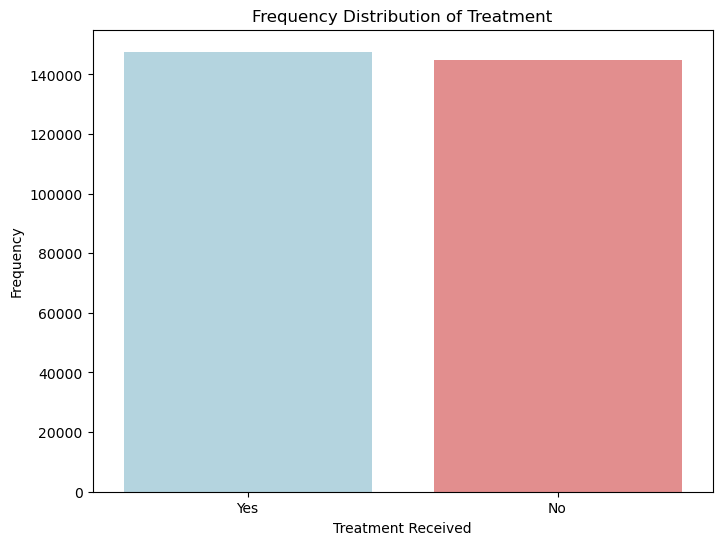

In [177]:
variable_treatment = 'Treatment'  

treatment_frequency = df[variable_treatment].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=treatment_frequency.index, y=treatment_frequency.values, palette=['lightblue', 'lightcoral'])
plt.title('Frequency Distribution of Treatment')
plt.xlabel('Treatment Received')
plt.ylabel('Frequency')

It can be observed that there is a similar proportion of individuals who have received treatment and those who have not.

Text(0, 0.5, 'Count')

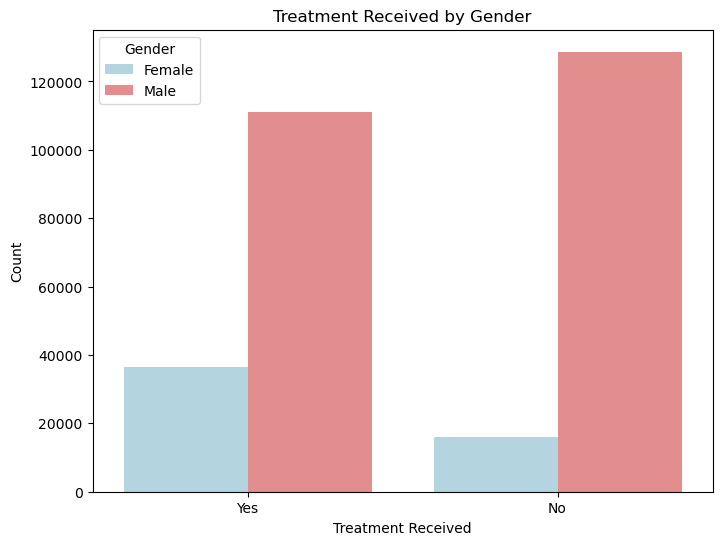

In [178]:
# Treatment received by Gender

plt.figure(figsize=(8, 6))
sns.countplot(x='Treatment', hue='Gender', data=df, palette=['lightblue', 'lightcoral'])
plt.title('Treatment Received by Gender')
plt.xlabel('Treatment Received')
plt.ylabel('Count')


As observed, the data is predominantly represented by males. The number of males receiving treatment is significantly higher than the number of females. Specifically, there are around 111,150 males receiving treatment, while there are only approximately 36,456 females. Additionally, in terms of individuals not receiving treatment, the disparity between males and females is also notable, with around 128,700 males and approximately 16,058 females. This gender imbalance in the data representation is important to consider when interpreting the results and may influence the conclusions that can be drawn from the analysis.

In [179]:
#Separate data by 'gender'
gender_groups = df.groupby('Gender')

female_df = gender_groups.get_group('Female')
male_df = gender_groups.get_group('Male')

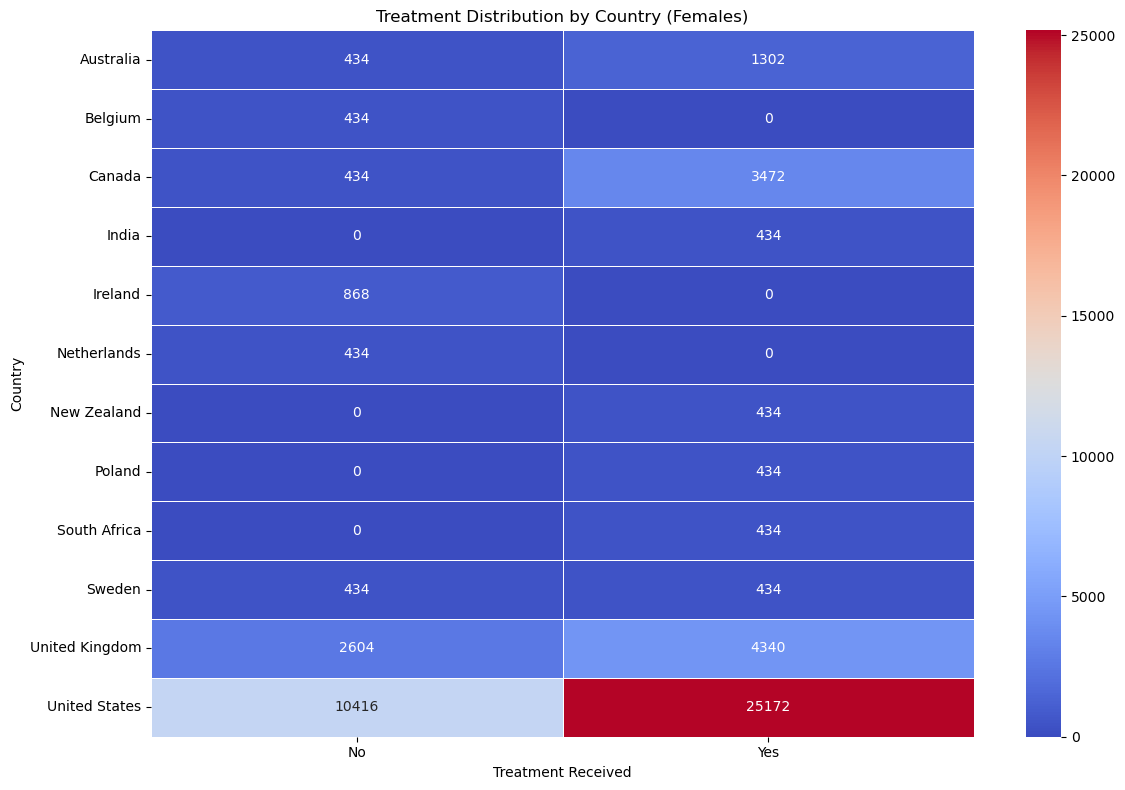

In [180]:
# Creating a pivot table to count the number of treatments received in each country with females data
pivot_table_female = df_female.pivot_table(index='Country', columns='Treatment', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_female, 
            cmap='coolwarm', 
            annot=True, 
            fmt='g', 
            cbar=True, 
            linewidths=0.5)
plt.title('Treatment Distribution by Country (Females)')
plt.xlabel('Treatment Received')
plt.ylabel('Country')
plt.tight_layout()


The distribution of treatment shows significant variations among the different countries, suggesting a disparity in the prevalence of mental health treatment among women. It is "curious" that the values of several columns are exactly the same, which could be attributed to either missing data or the data collection method.

It's interesting to note that countries like Belgium, Ireland and the Netherlands report zero women receiving treatment, On the other hand, in countries like India, New Zealand, Poland, and South Africa, there are no women who do not receive treatment, which may indicate a better access to mental health care or greater awareness of the issue.

The disparity in treatment distribution among countries may reflect differences in awareness, access, and available resources to address women's mental health needs. Countries with a higher number of women receiving treatment may have greater awareness of the importance of treatment. Countries with a lower proportion of women receiving treatment may need increased attention and resources to address access barriers and improve awareness about mental health.

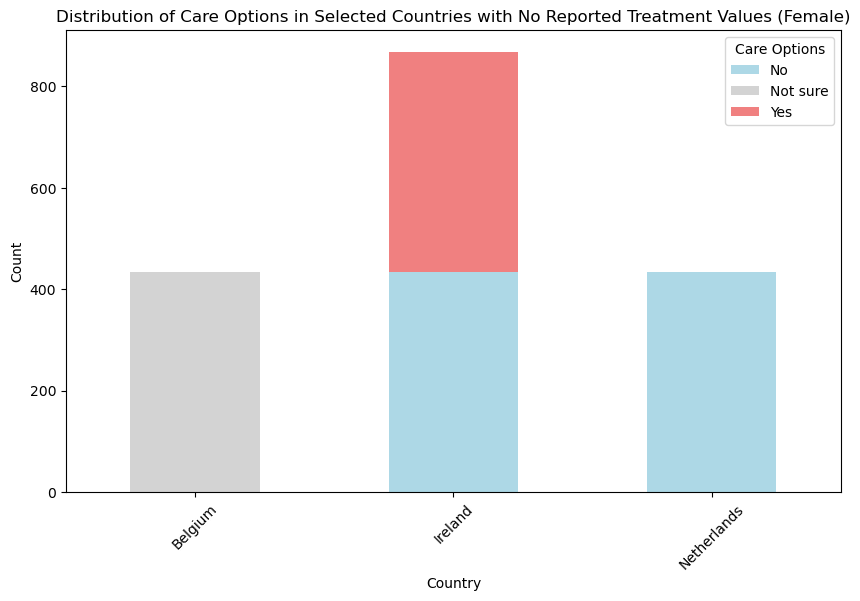

In [181]:
# Analyzing Treatment vs Care Options for the countries with values "Yes Treatment" == 0 

selected_countries_zero = ['Belgium', 'Ireland', 'Netherlands']
df_selected_countries_zero = df_female[(df_female['Country'].isin(selected_countries_zero)) & (df_female['Treatment'] == 'No')]


contingency_table_1 = pd.crosstab(index=df_selected_countries_zero['Country'], columns=df_selected_countries_zero['Care_Options'])

contingency_table_1.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'lightgray', 'lightcoral'], stacked=True)


plt.title('Distribution of Care Options in Selected Countries with No Reported Treatment Values (Female)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.legend(title='Care Options')


In [182]:
contingency_table_1

Care_Options,No,Not sure,Yes
Country,,,
Belgium,0,434,0
Ireland,434,0,434
Netherlands,434,0,0


The observations in the table and in the graphic reveals interesting patterns in the distribution of care options among the selected countries. In Belgium, all individuals show uncertainty about whether they have available care options. In Ireland, the distribution is equitable, with half of the individuals reporting having care options and the other half not having it. On the other hand, in the Netherlands, all individuals have care options.

It is worth noting that these data show a notable coincidence in the proportions across countries, which could indicate a limitation in the variety of responses or an underlying pattern in data collection.

However, cannot conclude that the lack of care options in these countries is a direct indicator of the lack of treatment choice.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'New Zealand'),
  Text(2, 0, 'Poland'),
  Text(3, 0, 'South Africa')])

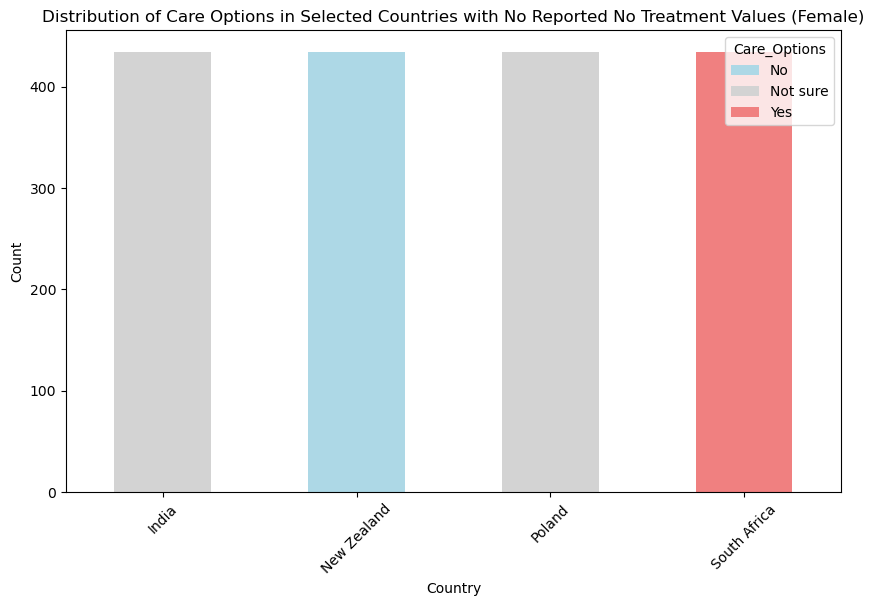

In [200]:
# Analyzing Treatment vs Care Options for the countries with values "No Treatment" == 0 

# Seleccionar los países específicos
selected_countries = ['India', 'New Zealand', 'Poland', 'South Africa']
df_selected_countries = df_female[(df_female['Country'].isin(selected_countries)) & (df_female['Treatment'] == 'Yes')]

contingency_table_2 = pd.crosstab(index=df_selected_countries['Country'], columns=df_selected_countries['Care_Options'])

contingency_table_2.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'lightgray', 'lightcoral'], stacked=True)

plt.title('Distribution of Care Options in Selected Countries with No Reported No Treatment Values (Female)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)


In [184]:
contingency_table_2


Care_Options,No,Not sure,Yes
Country,,,
India,0,434,0
New Zealand,434,0,0
Poland,0,434,0
South Africa,0,0,434


The data observed in the graph reveals striking patterns. If we attempt to infer based on these data, we could conclude that mental health treatment does not appear to be directly linked to access to care options. For example, in India, where individuals are unsure if they have care options, there were still no cases of lack of treatment reported. In New Zealand, where respondents lack care options, there were also no cases of lack of treatment observed. Lastly, in South Africa, although all respondents have care options, there were still no cases of lack of treatment reported. These findings suggest that other factors may influence the decision to seek mental health treatment beyond the perceived availability of care options.

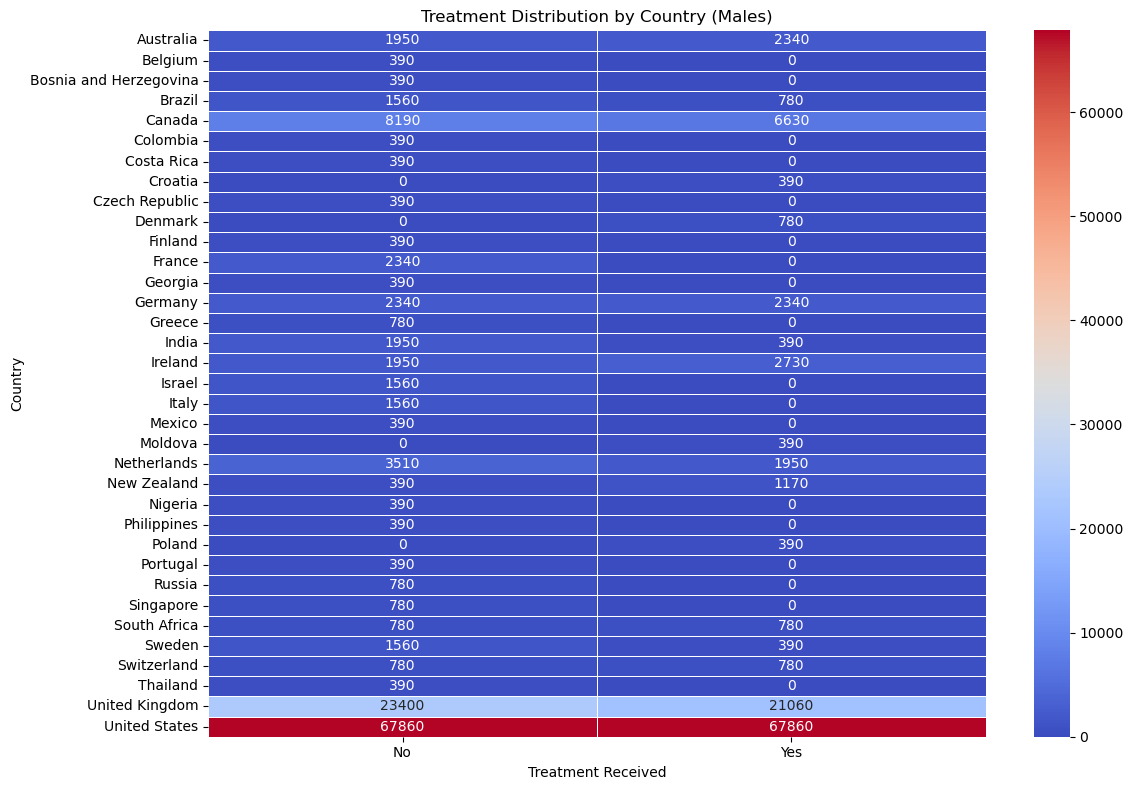

In [185]:
# Pivot table to count the number of treatments received in each country with male data
pivot_table_male = df_male.pivot_table(index='Country', columns='Treatment', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_male,
            cmap='coolwarm',
            annot=True, 
            fmt='g', 
            cbar=True, 
            linewidths=0.5)
plt.title('Treatment Distribution by Country (Males)')
plt.xlabel('Treatment Received')
plt.ylabel('Country')
plt.tight_layout()


Text(0, 0.5, 'Count')

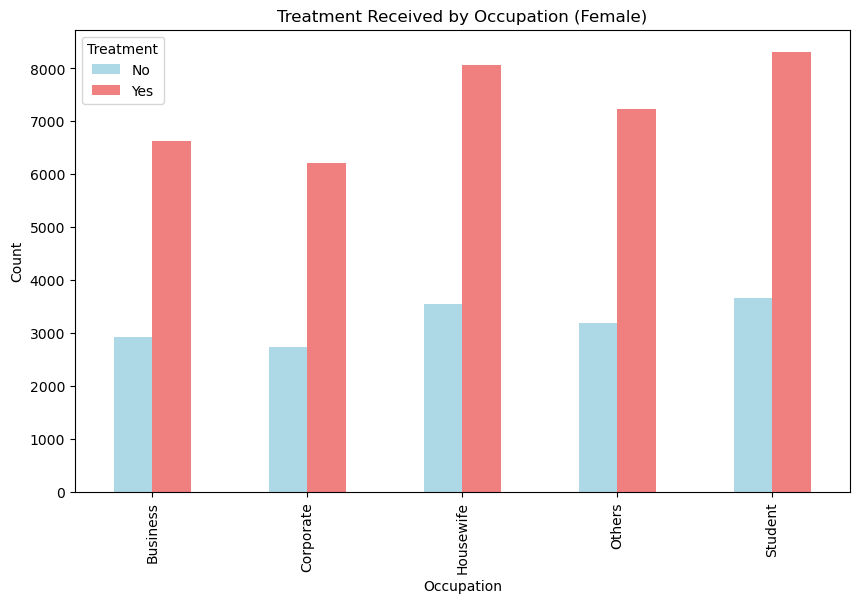

In [186]:
# Relationship between 'Treatment' and 'Occupation' female data

occupation_treatment_female = df_female.groupby(['Occupation', 'Treatment']).size().unstack()

occupation_treatment_female.plot(
    kind='bar',
    figsize=(10, 6),
    color=['lightblue', 'lightcoral'])
plt.title('Treatment Received by Occupation (Female)')
plt.xlabel('Occupation')
plt.ylabel('Count')

The graphic reveals a notable difference in the number of women receiving treatment compared to those who are not. It is evident that the number of women receiving treatment exceeds those who do not across most occupations, based on these dataframe.

The analysis highlights that the highest number of women receiving treatment is found in the "Student" occupation category, followed by "Housewife." This suggests that students and housewifes may have greater awareness or access to mental health care compared to other occupational groups of women. However, conducting a more detailed analysis would be important to fully understand the reasons behind these differences and to identify potential areas for intervention to improve treatment access for other occupations.

In [187]:
# contingency table between 'family_history' and 'treatment' for female
contingency_table_3 = pd.crosstab(df_female['Family_History'], df_female['Treatment'])

contingency_table_3

Treatment,No,Yes
Family_History,,
No,10416,10416
Yes,5642,26040


(array([0.5, 1.5]), [Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')])

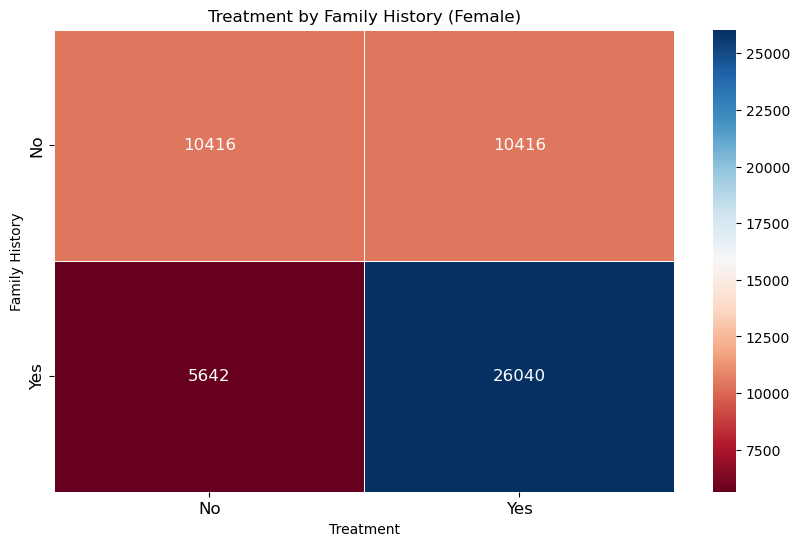

In [188]:
# visualizing the contingency table

plt.figure(figsize=(10, 6))

sns.heatmap(contingency_table_3, annot=True, cmap='RdBu', fmt='d', linewidths=.5, annot_kws={"size": 12})
plt.title('Treatment by Family History (Female)')
plt.xlabel('Treatment')
plt.ylabel('Family History')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

From the heatmap based on the contingency table, several conclusions can be drawn:

- Individuals with a family history of mental health issues are more likely to receive treatment compared to those without such family history. This is evidenced by the higher count of "Yes" in the "Treatment" column for individuals with family history compared to those without.

- There is a significant disparity in treatment between individuals with and without family history.

- A remarkable observation is that among individuals without family history, the count of "No" and "Yes" treatments is exactly equal (10416 each).

The heatmap provides a clear visualization of the relationship between family history and treatment, highlighting the influence of family history as a factor in the decision to seek treatment for mental health issues.

In [189]:
# Work interest vs Treatment 

contingency_table_4 = pd.crosstab(df_female['Work_Interest'], df_female['Treatment'])

contingency_table_4


Treatment,No,Yes
Work_Interest,,
Maybe,5365,12180
No,5661,12852
Yes,5032,11424


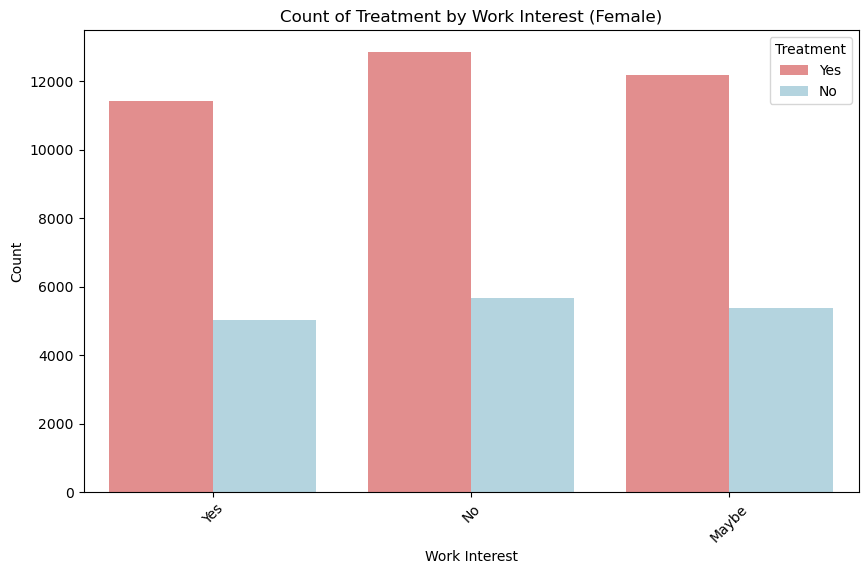

In [190]:
# visualizing the contingency table 2

palette_1 = {'Yes': 'lightcoral', 'No': 'lightblue'}

plt.figure(figsize=(10, 6))

sns.countplot(x ='Work_Interest', hue ='Treatment', data = df_female, palette = palette_1, order=['Yes', 'No', 'Maybe'])

plt.title('Count of Treatment by Work Interest (Female)')
plt.xlabel('Work Interest')
plt.ylabel('Count')

plt.xticks(rotation = 45)

plt.legend(title ='Treatment', loc ='upper right')


For the previous graph, one can observe:

- Those with a work interest classified as "No" have the highest number of individuals receiving treatment for mental health, followed by those with a work interest classified as "Maybe" and then "Yes".
- The proportion of individuals not receiving treatment is higher for those with a work interest classified as "No", followed by "Maybe" and then "Yes".

It seems that the work interest may be a relevant factor in the decision to seek treatment for mental health issues. However, further analysis and possibly additional data would be needed to fully understand the nature of this association and its implications.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Corporate'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Business'),
  Text(3, 0, 'Housewife'),
  Text(4, 0, 'Others')])

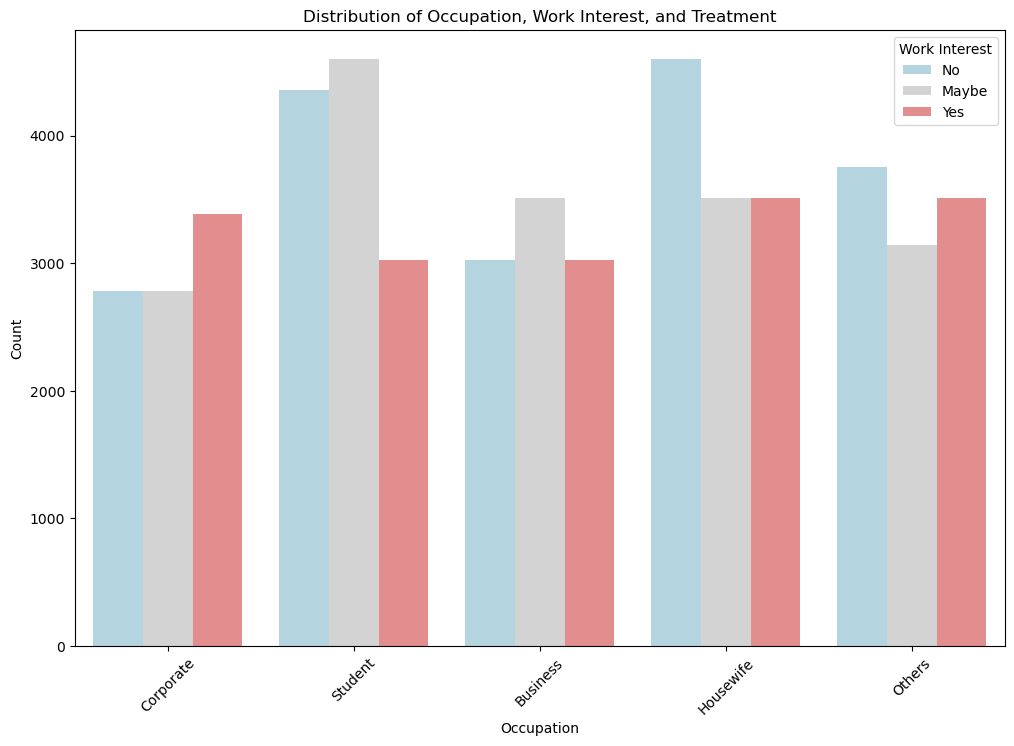

In [191]:
# visualizing distribution of occupation, Work interest and Treatment

palette_2 = {'Yes': 'lightcoral', 'No': 'lightblue', 'Maybe': 'lightgray'}

plt.figure(figsize=(12, 8))

sns.countplot(x ='Occupation', hue ='Work_Interest', data = df_female, palette = palette_2)

plt.title('Distribution of Occupation, Work Interest, and Treatment')
plt.xlabel('Occupation')
plt.ylabel('Count')

plt.legend(title='Work Interest')

plt.xticks(rotation=45)

The conclusions based on the graph showing the distribution of occupation, work interest, and treatment:

- There is no clear evident association between occupation and individuals' work interest.
- Within each occupation category, the distribution of work interest varies, but it does not seem to be strongly influenced by occupation.
- A clear relationship between occupation, work interest, and whether individuals receive treatment for mental health cannot be determined.

These conclusions suggest that occupation and work interest alone may not be strong predictors of mental health treatment.